# Họ và Tên: Nguyễn Thiên An    
# MSSV:2174802010859

### Câu 1 (2 điểm): Cho một ảnh bất kỳ (tên ảnh do sinh viên tự đặt, ví dụ: `my_image.jpg`) và thực hiện các yêu cầu sau:

* Viết chương trình sử dụng median filter để làm mịn ảnh. (0.5 điểm)  
* Viết chương trình sử dụng Sobel filter để xác định biên của hình ảnh. (0.5 điểm)  
* Đổi màu ảnh bằng cách hoán đổi thứ tự các kênh màu (ví dụ: BGR → GRB hoặc GBR...) và lưu thành tên dạng `[ten_anh]_swapped.jpg`. (0.5 điểm)  
* Chuyển ảnh sang không gian màu LAB và tách riêng 3 kênh L, A, B, lưu thành ảnh grayscale tương ứng (`[ten_anh]_L.jpg`, `[ten_anh]_A.jpg`, `[ten_anh]_B.jpg`). (0.5 điểm)


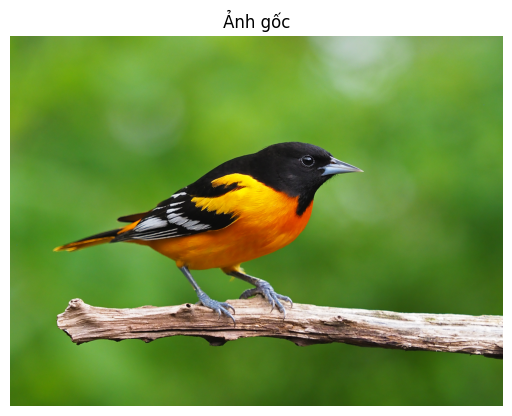

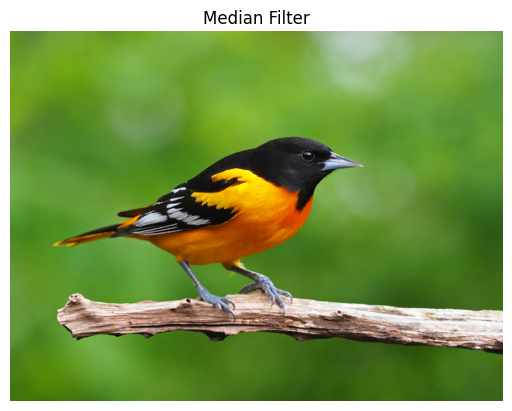

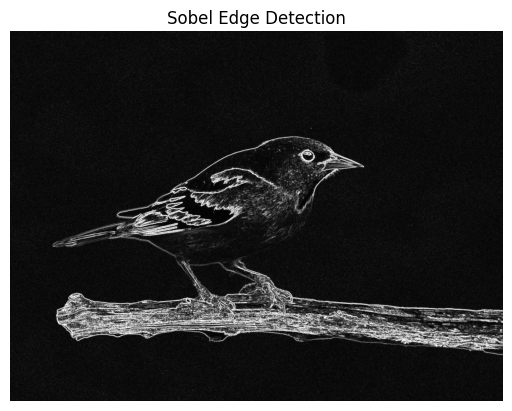

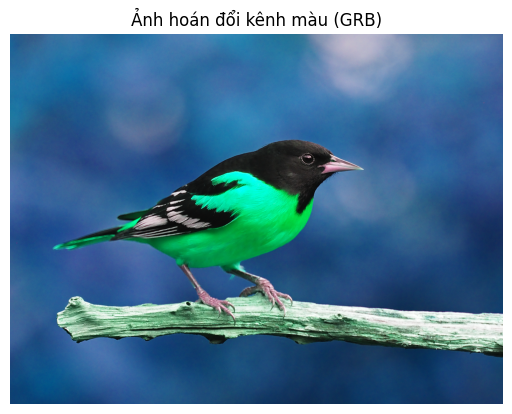

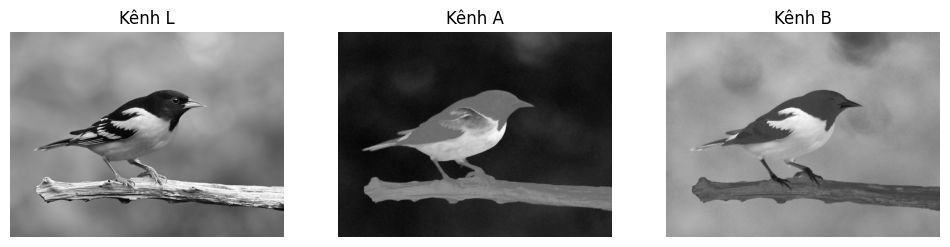

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image_name = 'my_image.jpg'

img = cv2.imread(image_name)
if img is None:
    raise FileNotFoundError(f"Không tìm thấy ảnh tên {image_name}")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Ảnh gốc')
plt.axis('off')
plt.show()


median_filtered = cv2.medianBlur(img, 5)
cv2.imwrite('{}_median.jpg'.format(image_name.split('.')[0]), median_filtered)


plt.imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
plt.title('Median Filter')
plt.axis('off')
plt.show()


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)
sobel = np.uint8(np.clip(sobel, 0, 255))

cv2.imwrite('{}_sobel.jpg'.format(image_name.split('.')[0]), sobel)

plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()


swapped = img.copy()
swapped = swapped[:, :, [1, 2, 0]] 

swapped_filename = '{}_swapped.jpg'.format(image_name.split('.')[0])
cv2.imwrite(swapped_filename, swapped)

plt.imshow(cv2.cvtColor(swapped, cv2.COLOR_BGR2RGB))
plt.title('Ảnh hoán đổi kênh màu (GRB)')
plt.axis('off')
plt.show()


lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L, A, B = cv2.split(lab)

cv2.imwrite('{}_L.jpg'.format(image_name.split('.')[0]), L)
cv2.imwrite('{}_A.jpg'.format(image_name.split('.')[0]), A)
cv2.imwrite('{}_B.jpg'.format(image_name.split('.')[0]), B)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(L, cmap='gray')
axs[0].set_title('Kênh L')
axs[1].imshow(A, cmap='gray')
axs[1].set_title('Kênh A')
axs[2].imshow(B, cmap='gray')
axs[2].set_title('Kênh B')
for ax in axs:
    ax.axis('off')
plt.show()


### Câu 2 (4 điểm) Viết một chương trình Python sử dụng OpenCV để tạo menu tương tác cho phép người dùng chọn các kỹ thuật lọc và xử lý ảnh nâng cao từ một danh sách, áp dụng đồng thời cho nhiều ảnh.

### Yêu cầu:

1. Menu gồm:  
* Gaussian Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Median Blur (kernel size ngẫu nhiên lẻ từ 3 đến 11) (0.5 điểm)  
* Bilateral Filter (tham số ngẫu nhiên) (0.5 điểm)  
* Canny Edge Detection (thresholds ngẫu nhiên 50–150) (0.5 điểm)  
* Erosion (kernel 2x2 đến 5x5 ngẫu nhiên) (0.5 điểm)  
* Dilation (tương tự Erosion) (0.5 điểm)

2. Chương trình xử lý đồng thời 3 ảnh bất kỳ do sinh viên tự chọn (có thể chọn bằng đường dẫn file hoặc nhập tên ảnh tùy ý). (0.5 điểm)

3. Phím tương ứng để kích hoạt các phương pháp xử lý:  
* B: Gaussian Blur  
* M: Median Blur  
* F: Bilateral Filter  
* E: Canny Edge  
* R: Erosion  
* D: Dilation (0.5 điểm)

4. Lưu file kết quả với định dạng: `result_[phương pháp]_[tên ảnh gốc].jpg`  
   Ví dụ: `result_blur_dog.jpg`, `result_canny_image2.jpg` (0.5 điểm)


In [6]:
import cv2
import numpy as np
import random
import os

image_paths = ['Cho.jpg', 'Meo.jpg', 'Hoa.jpg']

images = []
image_names = []

for path in image_paths:
    if not os.path.exists(path):
        print(f"Không tìm thấy ảnh: {path}")
        continue
    img = cv2.imread(path)
    images.append(img)
    image_names.append(os.path.splitext(os.path.basename(path))[0])

if len(images) == 0:
    raise ValueError("Không có ảnh hợp lệ nào được tải.")

print("Đã tải thành công ảnh:", image_names)


def process_and_save(process_name, func):
    for i in range(len(images)):
        result = func(images[i])
        out_name = f"result_{process_name}_{image_names[i]}.jpg"
        cv2.imwrite(out_name, result)
        print(f"✅ Đã lưu: {out_name}")


def gaussian_blur(img):
    k = random.choice([3, 5, 7, 9, 11])
    return cv2.GaussianBlur(img, (k, k), 0)

def median_blur(img):
    k = random.choice([3, 5, 7, 9, 11])
    return cv2.medianBlur(img, k)

def bilateral_filter(img):
    d = random.randint(5, 15)
    sigma_color = random.randint(50, 150)
    sigma_space = random.randint(50, 150)
    return cv2.bilateralFilter(img, d, sigma_color, sigma_space)

def canny_edge(img):
    low = random.randint(50, 100)
    high = random.randint(low + 10, 150)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Canny(gray, low, high)

def erosion(img):
    k = random.choice([2, 3, 4, 5])
    kernel = np.ones((k, k), np.uint8)
    return cv2.erode(img, kernel, iterations=1)

def dilation(img):
    k = random.choice([2, 3, 4, 5])
    kernel = np.ones((k, k), np.uint8)
    return cv2.dilate(img, kernel, iterations=1)


print("""
======== MENU XỬ LÝ ẢNH ========
B: Gaussian Blur
M: Median Blur
F: Bilateral Filter
E: Canny Edge Detection
R: Erosion
D: Dilation
Q: Thoát
===============================
""")

while True:
    key = input("👉 Nhấn phím tương ứng (B/M/F/E/R/D/Q): ").upper()

    if key == 'B':
        process_and_save('blur', gaussian_blur)
    elif key == 'M':
        process_and_save('median', median_blur)
    elif key == 'F':
        process_and_save('bilateral', bilateral_filter)
    elif key == 'E':
        process_and_save('canny', canny_edge)
    elif key == 'R':
        process_and_save('erosion', erosion)
    elif key == 'D':
        process_and_save('dilation', dilation)
    elif key == 'Q':
        print("👋 Thoát chương trình.")
        break
    else:
        print("⚠️ Phím không hợp lệ. Vui lòng thử lại.")

image_paths = ['your_image1.jpg', 'your_image2.jpg', 'your_image3.jpg']


Đã tải thành công ảnh: ['Cho', 'Meo', 'Hoa']

======== MENU XỬ LÝ ẢNH ========
B: Gaussian Blur
M: Median Blur
F: Bilateral Filter
E: Canny Edge Detection
R: Erosion
D: Dilation
Q: Thoát

✅ Đã lưu: result_blur_Cho.jpg
✅ Đã lưu: result_blur_Meo.jpg
✅ Đã lưu: result_blur_Hoa.jpg
✅ Đã lưu: result_blur_Cho.jpg
✅ Đã lưu: result_blur_Meo.jpg
✅ Đã lưu: result_blur_Hoa.jpg


KeyboardInterrupt: Interrupted by user

### Câu 3 (4 điểm) Viết một chương trình Python để xử lý 3 ảnh bất kỳ do sinh viên tự chọn.

* Tăng kích thước ảnh đầu tiên thêm 35 pixel ở mỗi cạnh. (0.5 điểm)  
* Xoay ảnh thứ hai 135 độ và lật ngang. (0.5 điểm)  
* Tăng kích thước ảnh thứ ba lên 5 lần và làm mịn bằng Gaussian blur kernel 9x9. (1.5 điểm)  
* Thay đổi độ sáng và độ tương phản ảnh thứ ba bằng công thức:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong đó:  

$$
\alpha \in [0.5, 2.0], \quad \beta \in [-50, 50]
$$

Giá trị đầu ra cần được giới hạn trong khoảng [0, 255] bằng công thức:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


In [8]:
import cv2
import numpy as np
import random
import os

image_paths = ['ChiPhien.jpg', 'HongTy.jpg', 'DonaldTrump.jpg'] 

images = []
image_names = []

for path in image_paths:
    img = cv2.imread(path)
    if img is not None:
        images.append(img)
        image_names.append(os.path.splitext(os.path.basename(path))[0])
    else:
        print(f"Không thể đọc ảnh: {path}")

if len(images) != 3:
    raise ValueError("⚠️ Cần đúng 3 ảnh hợp lệ.")

#Tăng kích thước thêm 35px mỗi cạnh
border_size = 35
res1 = cv2.copyMakeBorder(
    images[0],
    border_size, border_size,
    border_size, border_size,
    borderType=cv2.BORDER_CONSTANT,
    value=[0, 0, 0]  # màu đen
)
cv2.imwrite(f"result_padding_{image_names[0]}.jpg", res1)

#Xoay 135 độ và lật ngang 
(h, w) = images[1].shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 135, 1.0)
rotated = cv2.warpAffine(images[1], M, (w, h))
flipped = cv2.flip(rotated, 1)  # Lật 
cv2.imwrite(f"result_rotate_flip_{image_names[1]}.jpg", flipped)

#Phóng to gấp 5 và làm mịn
resized = cv2.resize(images[2], None, fx=5.0, fy=5.0, interpolation=cv2.INTER_LINEAR)
blurred = cv2.GaussianBlur(resized, (9, 9), 0)

#Thay đổi độ sáng và tương phản
alpha = round(random.uniform(0.5, 2.0), 2)
beta = random.randint(-50, 50)

adjusted = cv2.convertScaleAbs(blurred, alpha=alpha, beta=beta)

cv2.imwrite(f"result_resize_blur_{image_names[2]}.jpg", blurred)
cv2.imwrite(f"result_adjusted_{image_names[2]}.jpg", adjusted)

#In ra thông số điều chỉnh
print(f"✅ Đã xử lý ảnh {image_names[2]} với alpha={alpha}, beta={beta}")


✅ Đã xử lý ảnh DonaldTrump với alpha=1.31, beta=19


# Chúc các bạn làm bài may mắn, hi vọng mọi người qua môn tất cả được 10.